In [1]:
## Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
from sklearn.model_selection import train_test_split
import sys
import os
sys.path.append(os.path.abspath("../.."))
from src.preprocessing.preprocessing_functions import *

# 1. Load Data

In [2]:
# Load all track data
track_data_br1 = pd.read_csv('/Users/inescunha/Documents/GitHub/explanation/ALM272_BR1_tracks_0606224.csv') 
track_data_br2 = pd.read_csv('/Users/inescunha/Documents/GitHub/explanation/ALM272_BR2_tracks_0606224.csv') 
track_data_br3 = pd.read_csv('/Users/inescunha/Documents/GitHub/explanation/ALM272_BR3_tracks_060624.csv') 

filtered_track_br1, y_train_br1 = process_track_data(track_data_br1)
filtered_track_br2, y_train_br2 = process_track_data(track_data_br2)
filtered_track_br3, y_train_br3 = process_track_data(track_data_br3)

Filtered data shape (478, 1080, 19) (478,)
Filtered data shape (493, 1080, 19) (493,)
Filtered data shape (856, 1080, 19) (856,)


In [3]:
sub_size = (20, 20)

# BR1
images_br1, y_train_br1_ = process_all_fovs(track_data_br1, sub_size, bioreplicate = "BR1", segmentation=False, FRET=False)
segmentations_br1, y_train_br1_ = process_all_fovs(track_data_br1, sub_size, bioreplicate = "BR1", segmentation=True, FRET=False)
fret_br1, y_train_br1_ = process_all_fovs(track_data_br1, sub_size, bioreplicate = "BR1", segmentation=True, FRET=True)

# BR2
images_br2, y_train_br2_ = process_all_fovs(track_data_br2, sub_size, bioreplicate = "BR2", segmentation=False, FRET=False)
segmentations_br2, y_train_br2_ = process_all_fovs(track_data_br2, sub_size, bioreplicate = "BR2", segmentation=True, FRET=False)
fret_br2, y_train_br2_ = process_all_fovs(track_data_br2, sub_size, bioreplicate = "BR2", segmentation=True, FRET=True)

# BR3
images_br3, y_train_br3_ = process_all_fovs(track_data_br3, sub_size, bioreplicate = "BR3", segmentation=False, FRET=False)
segmentations_br3, y_train_br3_ = process_all_fovs(track_data_br3, sub_size, bioreplicate = "BR3", segmentation=True, FRET=False)
fret_br3, y_train_br3_ = process_all_fovs(track_data_br3, sub_size, bioreplicate = "BR3", segmentation=True, FRET=True)

print("BR1 Images shape:", images_br1.shape, "BR2:", images_br2.shape, "BR3:", images_br3.shape)
print("BR1 tracks shape:", filtered_track_br1.shape, "BR2:", filtered_track_br2.shape, "BR3:", filtered_track_br3.shape)

[ 1  1  1 ... 20 20 20]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B03_G001_0001.tif']
[21 21 21 ... 39 39 39]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B03_G002_0001.tif']
[40 40 40 ... 59 59 59]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B03_G003_0001.tif']
[ 60  60  60 ... 122 122 122]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B04_G004_0001.tif']
[123 123 123 ... 161 161 161]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B04_G005_0001.tif']
[162 162 162 ... 203 203 203]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B04_G006_0001.tif']
[204 204 204 ... 296 296 296]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B05_G007_0001.tif']
[297 297 297 ... 375 375 375]
bioreplicate: B

# 2. Remove cells from edges of FOV

In [4]:
#### Removing cells in edges of the FOV ####

indexes_to_remove_br1 = edge_indexes(images_br1)

images_br1_no_edges = np.delete(images_br1, indexes_to_remove_br1, axis=0)
y_train_br1_no_edges = np.delete(y_train_br1_, indexes_to_remove_br1)
segmentations_br1_no_edges = np.delete(segmentations_br1, indexes_to_remove_br1, axis=0)
filtered_track_br1_no_edges = np.delete(filtered_track_br1, indexes_to_remove_br1, axis=0)

print("New dataset shape:", images_br1_no_edges.shape, "Segmentations shape:", segmentations_br1_no_edges.shape, "tracks:", filtered_track_br1_no_edges.shape, "y train:", y_train_br1_no_edges.shape)


New dataset shape: (452, 1080, 3, 20, 20) Segmentations shape: (452, 1080, 20, 20) tracks: (452, 1080, 19) y train: (452,)


In [5]:
indexes_to_remove_br2 = edge_indexes(images_br2)

images_br2_no_edges = np.delete(images_br2, indexes_to_remove_br2, axis=0)
y_train_br2_no_edges = np.delete(y_train_br2_, indexes_to_remove_br2)
segmentations_br2_no_edges = np.delete(segmentations_br2, indexes_to_remove_br2, axis=0)
filtered_track_br2_no_edges = np.delete(filtered_track_br2, indexes_to_remove_br2, axis=0)

print("New dataset shape:", images_br2_no_edges.shape, "Segmentations shape:", segmentations_br2_no_edges.shape, "tracks:", filtered_track_br2_no_edges.shape, "y train:", y_train_br2_no_edges.shape)


New dataset shape: (473, 1080, 3, 20, 20) Segmentations shape: (473, 1080, 20, 20) tracks: (473, 1080, 19) y train: (473,)


In [6]:
indexes_to_remove_br3 = edge_indexes(images_br3)

images_br3_no_edges = np.delete(images_br3, indexes_to_remove_br3, axis=0)
y_train_br3_no_edges = np.delete(y_train_br3_, indexes_to_remove_br3)
segmentations_br3_no_edges = np.delete(segmentations_br3, indexes_to_remove_br3, axis=0)
filtered_track_br3_no_edges = np.delete(filtered_track_br3, indexes_to_remove_br3, axis=0)

print("New dataset shape:", images_br3_no_edges.shape, "Segmentations shape:", segmentations_br3_no_edges.shape, "tracks:", filtered_track_br3_no_edges.shape, "y train:", y_train_br3_no_edges.shape)

New dataset shape: (804, 1080, 4, 20, 20) Segmentations shape: (804, 1080, 20, 20) tracks: (804, 1080, 19) y train: (804,)


# 3. Overimpose images with segmentations to remove background noise

In [7]:
overimposed_br1 = overimpose(images_br1_no_edges, segmentations_br1_no_edges)

In [8]:
overimposed_br2 = overimpose(images_br2_no_edges, segmentations_br2_no_edges)

In [9]:
overimposed_br3 = overimpose(images_br3_no_edges, segmentations_br3_no_edges)

# 4. Getting second generation cells from different cell tracks

In [10]:
indexes_daughter_br1 = daughter_indexes(filtered_track_br1_no_edges)
second_gen_br1 = filtered_track_br1_no_edges[indexes_daughter_br1]
second_gen_br1_images = overimposed_br1[indexes_daughter_br1]
second_gen_br1_y_train = y_train_br1_no_edges[indexes_daughter_br1]

print("Second generation BR1 shape:", second_gen_br1.shape, "Images shape:", second_gen_br1_images.shape, "y train shape:", second_gen_br1_y_train.shape)

Second generation BR1 shape: (57, 1080, 19) Images shape: (57, 1080, 2, 20, 20) y train shape: (57,)


In [33]:
indexes_daughter_br2 = daughter_indexes(filtered_track_br2_no_edges)
second_gen_br2 = filtered_track_br2_no_edges[indexes_daughter_br2]
second_gen_br2_images = overimposed_br2[indexes_daughter_br2]
second_gen_br2_y_train = y_train_br2_no_edges[indexes_daughter_br2]

print("Second generation BR2 shape:", second_gen_br2.shape, "Images shape:", second_gen_br2_images.shape, "y train shape:", second_gen_br2_y_train.shape)

Second generation BR2 shape: (63, 1080, 19) Images shape: (63, 1080, 2, 20, 20) y train shape: (63,)


In [36]:
indexes_daughter_br3 = daughter_indexes(filtered_track_br3_no_edges)
second_gen_br3 = filtered_track_br3_no_edges[indexes_daughter_br3]
second_gen_br3_images = overimposed_br3[indexes_daughter_br3]
second_gen_br3_y_train = y_train_br3_no_edges[indexes_daughter_br3]

print("Second generation BR3 shape:", second_gen_br3.shape, "Images shape:", second_gen_br3_images.shape, "y train shape:", second_gen_br3_y_train.shape)

Second generation BR3 shape: (87, 1080, 19) Images shape: (87, 1080, 2, 20, 20) y train shape: (87,)


## 4.1. Removing residual fates 0,1 from the training set

In [40]:
print(np.unique(second_gen_br1_y_train, return_counts=True))
print(np.unique(second_gen_br2_y_train, return_counts=True))
print(np.unique(second_gen_br3_y_train, return_counts=True))

(array([0, 1, 2, 3]), array([ 3,  2, 33, 19]))
(array([0, 1, 2, 3]), array([ 5,  1, 47, 10]))
(array([0, 1, 2, 3]), array([ 2,  2, 61, 22]))


In [49]:
indexes_with_0_y_train_br1 = np.where(second_gen_br1_y_train == 0)[0]
indexes_with_1_y_train_br1 = np.where(second_gen_br1_y_train == 1)[0]

indexes_with_0_y_train_br2 = np.where(second_gen_br2_y_train == 0)[0]
indexes_with_1_y_train_br2 = np.where(second_gen_br2_y_train == 1)[0]

indexes_with_0_y_train_br3 = np.where(second_gen_br3_y_train == 0)[0]
indexes_with_1_y_train_br3 = np.where(second_gen_br3_y_train == 1)[0]

3
2
5


In [68]:
second_gen_br1_images_ = np.delete(second_gen_br1_images, 
                                   np.concatenate([indexes_with_0_y_train_br1, indexes_with_1_y_train_br1]), 
                                   axis=0)

second_gen_br1_y_train_ = np.delete(second_gen_br1_y_train, 
                                   np.concatenate([indexes_with_0_y_train_br1, indexes_with_1_y_train_br1]), 
                                   axis=0)

second_gen_br1_tracks = np.delete(second_gen_br1, 
                                   np.concatenate([indexes_with_0_y_train_br1, indexes_with_1_y_train_br1]), 
                                   axis=0)



second_gen_br2_images_ = np.delete(second_gen_br2_images, 
                                   np.concatenate([indexes_with_0_y_train_br2, indexes_with_1_y_train_br2]), 
                                   axis=0)

second_gen_br2_y_train_ = np.delete(second_gen_br2_y_train, 
                                   np.concatenate([indexes_with_0_y_train_br2, indexes_with_1_y_train_br2]), 
                                   axis=0)

second_gen_br2_tracks = np.delete(second_gen_br2, 
                                   np.concatenate([indexes_with_0_y_train_br2, indexes_with_1_y_train_br2]), 
                                   axis=0)




second_gen_br3_images_ = np.delete(second_gen_br3_images, 
                                   np.concatenate([indexes_with_0_y_train_br3, indexes_with_1_y_train_br3]), 
                                   axis=0)

second_gen_br3_y_train_ = np.delete(second_gen_br3_y_train, 
                                   np.concatenate([indexes_with_0_y_train_br3, indexes_with_1_y_train_br3]), 
                                   axis=0)

second_gen_br3_tracks = np.delete(second_gen_br3, 
                                   np.concatenate([indexes_with_0_y_train_br3, indexes_with_1_y_train_br3]), 
                                   axis=0)


print(second_gen_br1_images_.shape)
print(second_gen_br1_y_train_.shape)
print(second_gen_br2_images_.shape)
print(second_gen_br2_y_train_.shape)
print(second_gen_br3_images_.shape)
print(second_gen_br3_y_train_.shape)

(52, 1080, 2, 20, 20)
(52,)
(57, 1080, 2, 20, 20)
(57,)
(83, 1080, 2, 20, 20)
(83,)


In [66]:
# np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_br1_images.npy", second_gen_br1_images_)
# np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_br1_y_train.npy", second_gen_br1_y_train_)
# np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_br2_images.npy", second_gen_br2_images_)    
# np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_br2_y_train.npy", second_gen_br2_y_train_)
# np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_br3_images.npy", second_gen_br3_images_)
# np.save("/Users/inescunha/Documents/GitHub/AI4CellFate/data/second_generation/second_gen_br3_y_train.npy", second_gen_br3_y_train_)

# 5. Getting second generation cells from same track as mother

In [69]:
def daughter_trace_keep_only(tabular_data, image_data):
    """
    Keeps only information from daughter cells in both tabular and image data.
    
    - For each cell (row) in tabular_data, it finds the first zero in column 4, **ignoring the first time point**.
    - From the beginning up to (but not including) that time point, it sets all values in that row to zero.
    - Values from that time point onward are kept unchanged.
    - The same index is used to set corresponding images in image_data to zero.

    Args:
        tabular_data (numpy.ndarray): A 3D matrix of shape (cells, time, features).
        image_data (numpy.ndarray): A 5D matrix of shape (cells, time, channels, height, width).

    Returns:
        tuple: Processed (tabular_data, image_data) with zeroed-out values from the beginning up to the determined index.
    """
    processed_tabular = tabular_data.copy()
    processed_images = image_data.copy()
    
    for cell_idx, cell in enumerate(processed_tabular):
        # Ignore the first time point and find the first zero in the 4th column (index 3)
        feature_values = cell[1:, 4]  # Start from the second time point
        first_zero_index = np.argmax(feature_values == 0) + 1 if np.any(feature_values == 0) else None  # Shift by 1
        
        # If a zero is found, zero out both tabular and image data from the beginning up to that time point
        if first_zero_index is not None:
            processed_tabular[cell_idx, :first_zero_index, :] = 0
            processed_images[cell_idx, :first_zero_index, :, :, :] = 0  # Zeroing corresponding images
    
    return processed_tabular, processed_images

In [73]:
processed_br1_2gen_tracks, processed_br1_2gen_images = daughter_trace_removal(second_gen_br1_tracks, second_gen_br1_images_)
processed_br2_2gen_tracks, processed_br2_2gen_images = daughter_trace_removal(second_gen_br2_tracks, second_gen_br2_images_)
processed_br3_2gen_tracks, processed_br3_2gen_images = daughter_trace_removal(second_gen_br3_tracks, second_gen_br3_images_)

# 6. Concatenate all bioreplicates

In [78]:
images = np.concatenate((processed_br1_2gen_images, processed_br2_2gen_images, processed_br3_2gen_images), axis=0)
tracks = np.concatenate((processed_br1_2gen_tracks, processed_br2_2gen_tracks, processed_br3_2gen_tracks), axis=0)
y_train_final = np.concatenate((second_gen_br1_y_train_, second_gen_br2_y_train_, second_gen_br3_y_train_), axis=0)

print(images.shape)
print(tracks.shape)
print(y_train_final.shape)

(192, 1080, 2, 20, 20)
(192, 1080, 19)
(192,)


In [90]:
# fate 2 is second generation of cells, that did not die. fate 3 is second generation of cells, that died.
y_train_ = np.where(y_train_final == 2, 1, y_train_final)  # Replace 2 with 1
y_train = np.where(y_train_ == 3, 0, y_train_)  # Replace 3 with 0

In [91]:
y_train

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1])

In [93]:
cleaned_images = clean_all_cells(images)

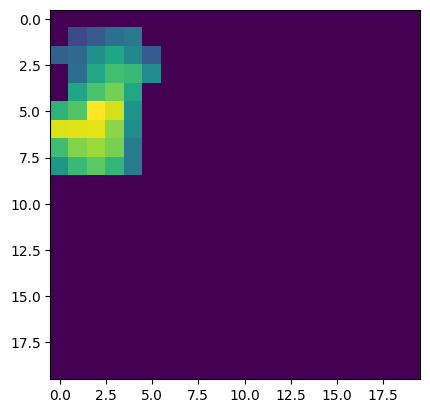

In [110]:
plt.imshow(cleaned_images[10,12,0])

In [ ]:
# dont forget to noramlise according to the x train that I used in the beginning